<figure>
  <IMG SRC="img/logo_ufaz.png" WIDTH=100 ALIGN="right">
</figure>

# Lab 1 : Plotting dataseries
*Signal Processing in Geosciences / A. Maggi / Sept 2020* 

---------

This lab is intended to get used to plot various type of dataseries in `Python`

-------

We start by loading the required modules (here `numpy` and `matplotlib`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Making your own signal

To illustrate various aspects of signal processing we usually start by looking at *simple* signals with an analytic form.

As we're working on a computer it is impossible to create purely analytic signals. We already need to discretize them by chossing a specific **sampling rate** ($\Delta t$ or $dt$).

We always need to create two `lists`(more specifically `arrays` since we will use the `numpy` module) :
* A list for the elements of the time vector $t_i$
* A list for the elements of the signal/data vector $y_i(t)$

with $i$ in $[0,N[$. Where $N$ is the number of data points 

----
> **Example 1**: To plot the function $y(t) = sin(2\pi t)$, we :
1. Define a variable for the sampling rate : $dt=0.05s$
2. Define a variable for the number of elements : $N=100$
3. create the time vector $t$ starting at $t_0=0s$
4. create the $y$ array by applying the formula
5. plot $y$ versus $t$ and add labels to the plot


Text(0.5,1,'y=sin(2.pi.t)')

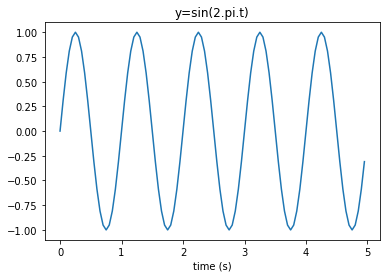

In [2]:
dt = 0.05 # sampling rate
N = 100 # Number of points
t = np.arange(0,N)*dt + 0 # alternative : t = np.arange(0,N*dt,dt)
y = np.sin(2*np.pi*t)

plt.plot(t,y)
plt.xlabel('time (s)')
plt.title('y=sin(2.pi.t)')

It looks continuous ... but it's not !

You can show that it is a discretized version of the function $y(t) = sin(2*pi*t)$ by forcing `plt.plot` to draw a marker at each defined point and no line for the interpolation:

Text(0.5,1,'y=sin(2.pi.t)')

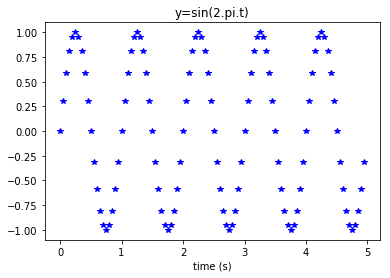

In [3]:
plt.plot(t,y,marker='*',linestyle='',color='b')
plt.xlabel('time (s)')
plt.title('y=sin(2.pi.t)')

-------
**Your turn** !

> Plot the following functions :
* $y(t) = cos(2\pi.t)$ for $t$ between $-5$ and $5$
* $y(t) = cos(2\pi.f_0.t)$ where $f_0$ is the frequency of the cosinus (variable that you can modify in you code)
* $y(t) = sin(2\pi.f_0.t).e^{-t^2}$ for $t>0$
* $y(t) = 1$
* $y(t) = 1$ if ($t \in [n.T,(n+1)T[$ where $n$ is even) and $y(t)=0$ elsewhere


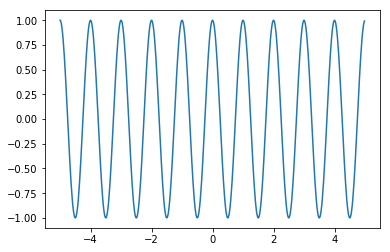

In [4]:
dt = 0.02
tmin = -5;tmax = 5
pi = np.pi
t = np.arange(tmin,tmax,dt)
y = np.cos(2*pi*t)
plt.plot(t,y)

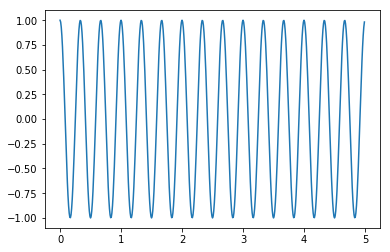

In [5]:
dt = 0.01
f0 = 3 # frequency of the cosinus
t = np.arange(0,5,dt)
y = np.cos(2*pi*f0*t)
plt.plot(t,y)

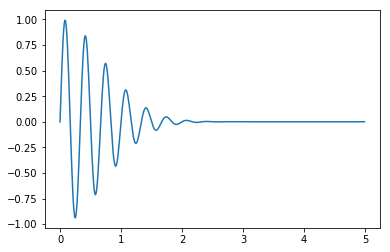

In [6]:
# We use the previous time array (t) and just change y
y = np.sin(2*pi*f0*t)*np.exp(-t*t/1)
plt.plot(t,y)

(0, 2)

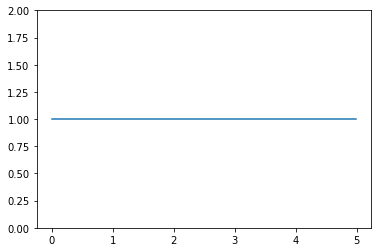

In [7]:
y = np.ones(len(t)) # or y = np.zeros(len(t))+1
plt.plot(t,y)
plt.ylim((0,2))

(0, 2)

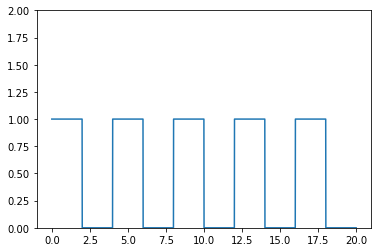

In [8]:
T= 2
t = np.arange(0,20,0.01)
y = np.zeros(len(t))

# option 1
for i,tt in enumerate(t):
    if np.floor(tt/T) % 2 == 0:
        y[i]=1

# option 2
y[np.floor(t/T) % 2 == 0] = 1
        
plt.plot(t,y)
plt.ylim((0,2))        

----------
## 2. Loading a signal from a file

When we have to analyze real datasets we usually have the information in a file that we need to import in *python* to analyze them.

In this course we will mostly work with very "simple" files with data organized in columns (with or without a column for time) in a human-readable text file.
However be aware that for big and complex datasets we usually use binary files and that the organisation of these files might be quite complicated (see for example the [SEED manual](http://www.fdsn.org/pdf/SEEDManual_V2.4.pdf) that define the norm for the exhange of seismological data over seismological observatories in the world or the [SEGY file format](https://seg.org/Portals/0/SEG/News%20and%20Resources/Technical%20Standards/seg_y_rev2_0-mar2017.pdf) largely ued for seismic data in the industry).

### 2.1 Timeseries of number of sunspots

We start by the file `sunspots.dat` which has 2 columns :
* Column 1 : year of observation
* Column 2 : Number of  black spots observed on the sun (sunspots)

For such type of files with only numerical values organized in columns we can use the module `loadtxt` from `numpy`to open the file and save the data into an array : 

In [9]:
A = np.loadtxt('Data/sunspots.dat')
print(np.shape(A))
print(A)

(315, 2)
[[1.700e+03 5.000e+00]
 [1.701e+03 1.100e+01]
 [1.702e+03 1.600e+01]
 [1.703e+03 2.300e+01]
 [1.704e+03 3.600e+01]
 [1.705e+03 5.800e+01]
 [1.706e+03 2.900e+01]
 [1.707e+03 2.000e+01]
 [1.708e+03 1.000e+01]
 [1.709e+03 8.000e+00]
 [1.710e+03 3.000e+00]
 [1.711e+03 0.000e+00]
 [1.712e+03 0.000e+00]
 [1.713e+03 2.000e+00]
 [1.714e+03 1.100e+01]
 [1.715e+03 2.700e+01]
 [1.716e+03 4.700e+01]
 [1.717e+03 6.300e+01]
 [1.718e+03 6.000e+01]
 [1.719e+03 3.900e+01]
 [1.720e+03 2.800e+01]
 [1.721e+03 2.600e+01]
 [1.722e+03 2.200e+01]
 [1.723e+03 1.100e+01]
 [1.724e+03 2.100e+01]
 [1.725e+03 4.000e+01]
 [1.726e+03 7.800e+01]
 [1.727e+03 1.220e+02]
 [1.728e+03 1.030e+02]
 [1.729e+03 7.300e+01]
 [1.730e+03 4.700e+01]
 [1.731e+03 3.500e+01]
 [1.732e+03 1.100e+01]
 [1.733e+03 5.000e+00]
 [1.734e+03 1.600e+01]
 [1.735e+03 3.400e+01]
 [1.736e+03 7.000e+01]
 [1.737e+03 8.100e+01]
 [1.738e+03 1.110e+02]
 [1.739e+03 1.010e+02]
 [1.740e+03 7.300e+01]
 [1.741e+03 4.000e+01]
 [1.742e+03 2.000e+01]
 [

We see that `loadtxt` automatically save each column of the file in separated column of the array `A`.

It might be easier to create 1-D arrays for each column with more obvious variable names.

Then the plotting is straitforward 

Text(0.5,1,'timeseries of sunspots')

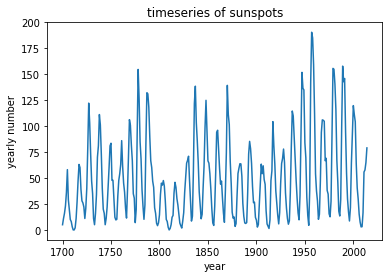

In [10]:
year = A[:,0]
spots = A[:,1]

plt.plot(year,spots)
plt.xlabel('year')
plt.ylabel('yearly number')
plt.title('timeseries of sunspots')

------
>Try to answer the following questions :
1. What is the sampling rate of this dataseries ?
2. Give the minimum,maximum and average number of sunspots per year
3. Can you guess what is the main periodicity of this timeseries ?
4. Should 2020 be a year with few / a lot / average number of sunspots ?


min/max/mean number of sunspots :  0.0 190.2 49.67587301587301


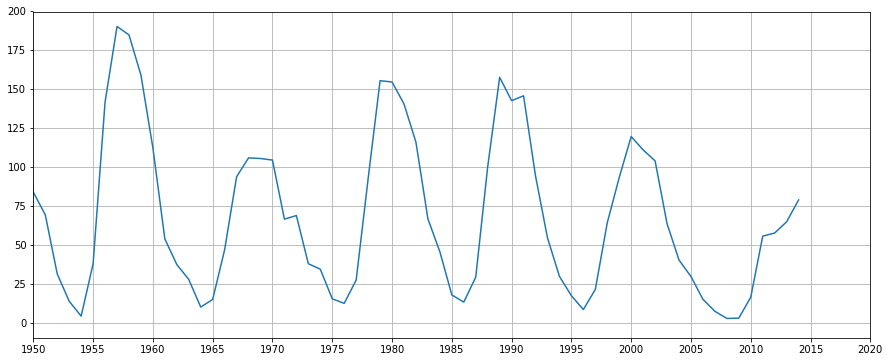

In [11]:
# Sampling rate
dt = year[1] - year[0] # assuming a constant sampling
# min/max/mean
print('min/max/mean number of sunspots : ',np.min(spots),np.max(spots),np.mean(spots))
# periodicity = 11 year
plt.figure(figsize=(15,6))
plt.plot(year,spots)
plt.xlim((1950,2020))
plt.xticks(np.arange(1950,2021,5))
plt.grid('on')

**Gravity data**

Close to Strasbourg, an EOST team operates a permanent supra-gravimeter ([link](https://eost.unistra.fr/en/observatories/geodesy-gravimetry/gravimetrie/instruments/gravimetre-supraconducteur/)) which measure with great precision the change of gravity $g$ due to various phenomena (tides, watertable, ...). This instrument is in operation since 1987 and provides one of the longest continuous timeseries of $g$ in the world.

Data are stored in the file `gravi.dat`. 
It contains only one colum corresponding to the value of $g$ (in $nm/s^2$ and relative to an unkown reference) measured each hour. Therefore the sampling rate is $dt = 1h$

> To do :
* Load the data and plot the timeseries
* change the x-axis such that it is labelled with years
* Remove the mean value from the timeseries
* zoom at different level to see the complexity of this dataset


Text(0.5,1,'gravity variation in Strasbourg')

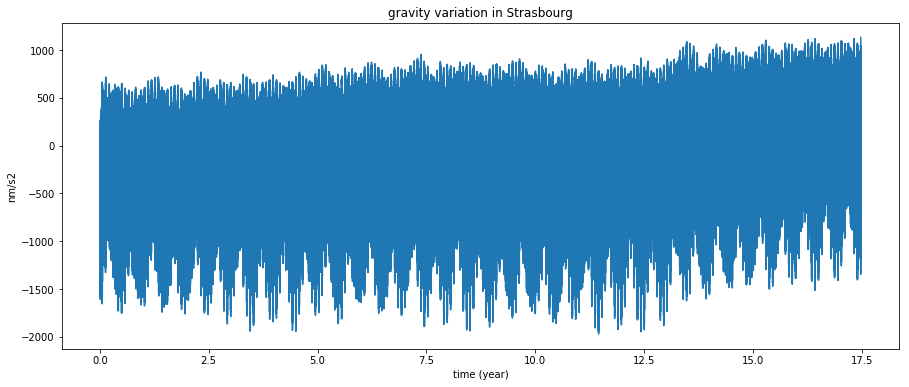

In [12]:
gravi = np.loadtxt('Data/gravi.dat')
dt = 1
t = np.arange(0,len(gravi))*dt
gravi = gravi - np.mean(gravi)
plt.figure(figsize=(15,6))
plt.plot(t/(365.25*24),gravi)
plt.xlabel('time (year)')
plt.ylabel('nm/s2')
plt.title('gravity variation in Strasbourg')

#plt.xlim((5.5,5.7)) # one zoom level

**A seismogram**

The file `seismogram.txt` contains the record of the 2015 Nepal earthquake (M7.8) at the seismic station ECH located in the Vosges (West of Strasbourg) which belong to Geoscope, the French international network of seismic stations (link).

The specificity of this file is that the first line, which start with a `#` contains some *meta-data* among them the sampling rate and the absolute start-time of the timeseries.

> To do :
1. Look at this file to see what is the the sampling rate
2. Read the data in this file (see the `comments` option of `loadtxt`) and plot the seismogram
3. Can you tell at what time arrive the P waves, the S waves and the surface waves ? What are the differences in the signal for each of theses wave packets ?

Text(0.5,1,'record of the Nepal earthquake in ECH')

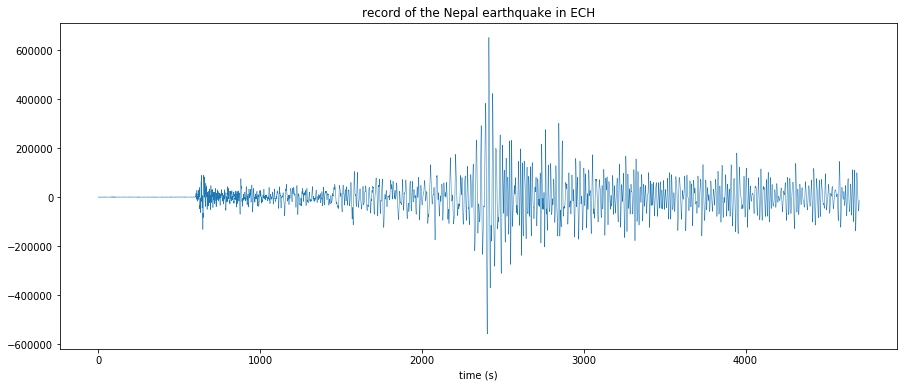

In [13]:
sismo = np.loadtxt('Data/seismogram.txt',comments="#")
dt = 1./20
t = np.arange(0,len(sismo))*dt

plt.figure(figsize=(15,6))
plt.plot(t,sismo,linewidth=0.5)
plt.xlabel('time (s)')
plt.title('record of the Nepal earthquake in ECH')

**Meteorological data**

The file `weather_strasbourg_august.txt` contains 3 columns : Temperature (in $K$), Wind speed (in $m/s$)  and Atmospheric pressure (in $Pa$) recorded close to Strasbourg every hour during the month of August 2014.

> To do :
* Read the data and chagne the temperature to $°C$ and the atmospheric pressure to $bar$
* plot the 3 timeseries in 3 sub-figures sharing the same x-axis
* Can you guess the main periodicity of temperature evolution in Strasbourg ?
* Do you see similarities between the evolution of these datasets ?

Text(0,0.5,'m/s')

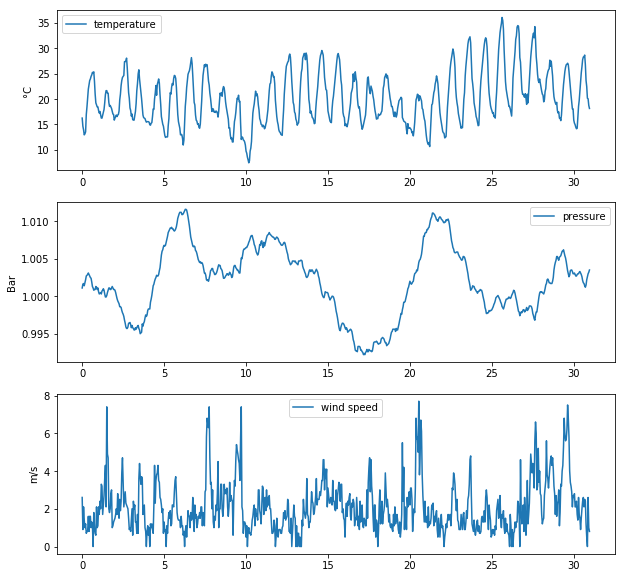

In [14]:
A = np.loadtxt('Data/weather_strasbourg_august.txt')

temp = A[:,0]-273
wind = A[:,1]
press = A[:,2]/1e5


dt = 1 # sampling in h
time = np.arange(0,len(temp))*dt

plt.figure(figsize=(10,10))
h = plt.subplot(3,1,1)
plt.plot(time/24,temp,label='temperature')
plt.legend()
plt.ylabel('°C')
plt.subplot(3,1,2,sharex=h)
plt.plot(time/24,press,label='pressure')
plt.legend()
plt.ylabel('Bar')
plt.subplot(3,1,3,sharex=h)
plt.plot(time/24,wind,label='wind speed')
plt.legend()
plt.ylabel('m/s')

**Sound of a guitar**

We finish by giving an example of a timeseries stored in a binary file format (that cannot be open with a text editor). 

The file `piano.wav` contains a 20s-long music played with a piano (source and more example [here](https://ccrma.stanford.edu/~jos/waveguide/Sound_Examples.html)).

The traditionnal format for music is `wav`.

To open this file we use `wavfile.read` from the `scipy.io` module.

In [15]:
from scipy.io import wavfile
wavfile.read?

By looking at the `wavfile.read` documentation we see that the output includes both the sampling rate and the data.

Also, the `piano.wav` is a stereo recording meaning that the data will be in 2-columns : One for the right speaker, one for the left speaker

> To do : 
* Open the `piano.wav` file, give the sampling rate and check the size of the data array
* Plot the timeseries for one of the data column
* Zoom over various part of the timeseries to better see its oscillatory aspect

*The file is quite big (3.8Mb) so the reading might take time. We advice to read the file in a code cell and to use another code cell to do the plotting and test various zoom*



In [16]:
rate,data = wavfile.read('Data/piano.wav')
print(np.shape(data))
t = np.arange(0,len(data))/rate

(961452, 2)


(0.2, 0.3)

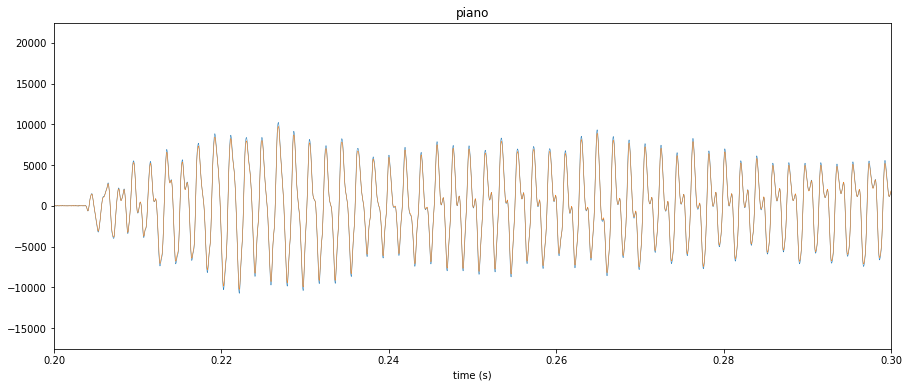

In [17]:
plt.figure(figsize=(15,6))
plt.plot(t,data,linewidth=0.5)
plt.xlabel('time (s)')
plt.title('piano')

plt.xlim((0.2,0.3))